1525.7738
517.9958
229.27579
146.55997
122.86261
116.073555
114.12851
113.57129
113.41166
113.36594
113.352806
113.34903
113.34796
113.34766
113.34756
113.34756
113.34755
113.34755
113.34753
113.34754
113.34752
113.34752
113.34752
113.34753
113.34752
113.34753
113.34751
113.34753
113.34751
113.34752
113.34751
113.34753
113.3475
113.34751
113.34752
113.34751
113.34752
113.34751
113.34752
113.34751
113.34752
113.34751
113.34752
113.3475
113.3475
113.34751
113.34752
113.34749
113.34753
113.34749
113.34748
113.34749
113.34747
113.34749
113.34747
113.34747
113.34747
113.34747
113.34748
113.34746
113.34749
113.34747
113.34749
113.34746
113.34749
113.34746
113.34749
113.34746
113.34748
113.34747
113.34748
113.34747
113.34748
113.34748
113.34744
113.34747
113.34744
113.34749
113.34746
113.34748
113.34746
113.34747
113.34747
113.347435
113.347435
113.347435
113.347435
113.34744
113.34741
113.34745
113.347404
113.34744
113.34741
113.34745
113.34741
113.34746
113.34742
113.34745
113.34742
113.347

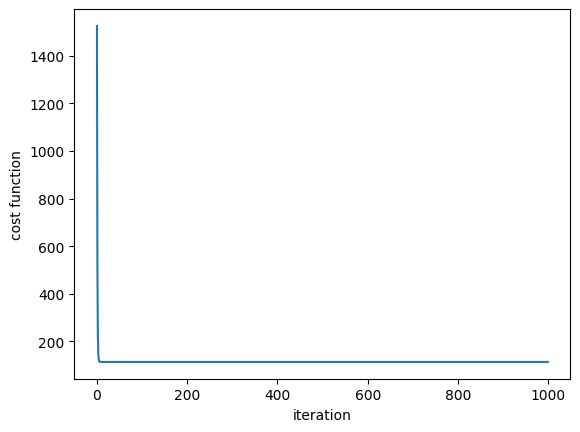

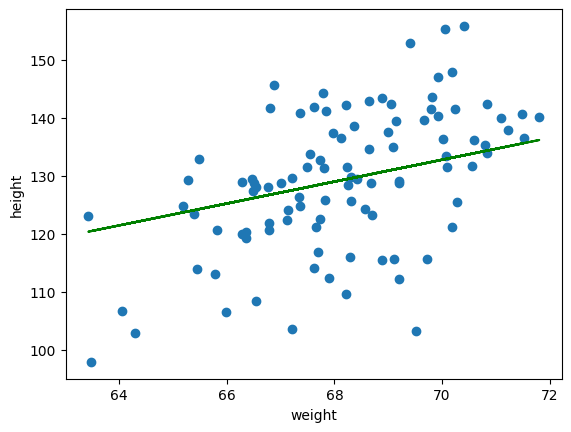

[1.8885237] [0.60198855]


In [ ]:
#<실습결과>
#learning_rate = 0.00001		[1.9050122] [-0.522425]
#learning_rate = 0.0001 			[1.8860503] [0.7706466] 가장 최적의 학습률
#learning_rate = 0.0002 			[1.8771274] [1.379096]
#learning_rate = 0.0003			[1.8344256] [4.2909184]
#learning_rate = 0.0004			[1.9104816] [-0.8953085]
#learning_rate = 0.0005			[nan] [nan]



# Lab 1: Linear Regression

# import library
import tensorflow as tf #tensorflow 모듈을 tf로 이름 지정 / 딥러닝
import numpy as np #numpy 모듈을 np로 이름지정 / 수치 계산
import pandas as pd #pandas 모듈을 pd로 이름지정 / 데이터 분석
import matplotlib.pyplot as plt #matplotlib.pyplot 모듈을 plt로 이름지정 / 데이터 시각화


# data load
df=pd.read_csv('SOCR-HeightWeight.csv') #pandas 모듈의 read_csv() 함수를 이용하여 외부 text나 csv 파일을 불러와서 DataFrame으로 저장해줌
df=df[:100] #100행전 99행까지 반환 / DataFrame에서 처음 100개의 행만 추출
x_data = np.array(df['Height'], dtype=np.float32) #각각 키와 몸무게 데이터를 NumPy 배열로 변환하고, 차원을 재조정 함.
y_data = np.array(df['Weight'], dtype=np.float32)
x_data = x_data.reshape(1,-1) #reshape를 이용해서 배열의 차원을 2차원으로 변형 (-1은 1행으로 고정해서 알아서 열을 만들라는 의미)
y_data = y_data.reshape(1,-1)


# Model parameter
# (1) W값 정의
W = tf.Variable(tf.random.normal([1]))  #[1]은 shape. 1 크기의 난수 / #variable 변수는 바꿀수있음

# (2) b값 정의
b = tf.Variable(tf.random.normal([1])) #tf.random.normal([1]): 평균이 0이고 표준편차가 1인 정규 분포에서 난수를 생성하여 초기값으로 설정



# learning rate (알파값 a)
# (3) a값 정의 (학습률)
learning_rate = 0.0001 #a값 크기에 따라 결과값어떻게 바뀌는지 확인


# Gradient descent
def gradientDescent():


  # predicted value: Wx + b (예측값)
  pred = W*x_data + b #현재 모델의 예측값을 계산

# 여기를 작성해 주세요 (본 알고리즘 이해 확실히 필요)
# Gradient descent algorithm
  model1 = W - learning_rate*tf.reduce_mean((pred - y_data)*x_data)
  # W-a(학습률) * 평균구하는함수(W*x_data+b(pred) - y (평균식) *x)
 # W에서 뺄셈 하는이유는 계산한값을 갱신하기위해서
  model2 = b - learning_rate*tf.reduce_mean((pred-y_data))
   # b-a(학습률) * 평균구하는함수(W*x_data+b(pred) - y (평균식))



# assign 메서드는 DataFrame에 새 열을 할당해줌
  W.assign(model1) #업데이트된 값을 W와 b에 할당
  b.assign(model2)



# model learning
cost = [] #계산된 값 저장할 빈 리스트 생성
for step in range(1000): #실제학습부분 횟수 바꿔가면서 어떻게 정확도 달라지는지
  gradientDescent() #실제학습부분


  pred = W*x_data + b #예측값 계산
  cost_inst = tf.reduce_mean(tf.square(pred - y_data)) # (W*x_data + b -y_data) 제곱의 평균 / cost 구하기
  cost = np.append(cost, cost_inst) #np.append()함수는 리스트 두개를 이어주는 역할 / 각 스텝에서 계산된 손실 함수 값을 저장

  print(cost_inst.numpy()) #계산된 cost값을 출력


# plot cost function
plt.plot(cost) #손실 함수 값의 변화를 그래프로 나타내줌
plt.xlabel('iteration')  # 첫번째 표 x축 이름 "반복"
plt.ylabel('cost function') #첫번째 표 y축 이름 "비용함수"
plt.show() #표그리기


# plot model
plt.scatter(x_data, y_data) #x,y데이터를 점으로 그리기
x_data = x_data.reshape(-1) #reshape: 데이터형태를 변경해줌 , -1은 원래 데이터의 요소 개수를 유지하면서 차원을 1차원으로 변환 (입력데이터 일렬로 배치하기위한 전처리과정임)
plt.plot(x_data, W*x_data + b, color='green') #학습된 모델을 그래프(선)로 나타내기 , W*x_data + b: 학습된모델의 예측값
plt.xlabel('weight') # 두번째 표 x축 이름
plt.ylabel('height') # 두번째 표 y축 이름
plt.show() #표그리기

print(W.numpy(), b.numpy()) #마지막 최종값


